# **E-commerce Customer Churn Analysis and Prediction**

By:
1. Nadia Puspitasari
2. Matthew Nicholas
3. Rayhan Romy Syahputra
---

## Business Problem Understanding

### Context

Sebuah perusahaan X memiliki bisnis di bidang E-Commerce dimana pembeli dan penjual bisa bertransaksi (melakukan penjualan/pembelian) melalui website tersebut. Transaksi pembelian dari website E-Commerce bisa datang dari berbagai kategori barang/jasa. Perusahaan X mendapatkan keuntungan dari tiap transaksi yang dilakukan oleh customer, sehingga adanya pertumbuhan customer dibutuhkan agar perusahaan bisa mendapatkan lebih banyak keuntungan. Di beberapa tahun terakhir perusahaan mengalami pertumbuhan customer yang cukup baik, namun dari data terbaru mulai menunjukkan bahwa adanya peningkatan customer yang churn dari keseluruhan customer di website E-Commerce tersebut. 

Sebagai konteks, ada dua cara agar perusahaan dapat mempertahankan pertumbuhan keuntungan. Pertama yaitu mempertahankan customer lama agar menetap sebagai customer. Cara kedua yaitu mencari customer baru. Berdasarkan statistik dari berbagai industri bisnis, hasil riset menemukan bahwa customer acquisition memiliki biaya 4-5x lipat lebih dari customer retention

Pada kesimpulannya, mendapatkan customer baru memakan biaya yang lebih banyak dibandingkan dengan mempertahankan customer lama untuk tidak churn sehingga kita harus lebih fokus ke customer retention. Sehingga, perusahaan harus memikirkan cara untuk memprediksi customer yang berpotensi untuk churn dan memberikan treatment yang diperlukan agar customer menetap di platform E-Commerce perusahaan.

Customer Retention Cost List:
- Staff costs for customer service, customer success, and account management
- Marketing costs focused on customer retention
- Customer loyalty programs

Kita asumsikan perusahaan per tahunnya menggelontorkan dana $100,000 untuk memaintain 1000 customer lama

Sehingga:

- **Retention Cost: $100/customer**

Sedangkan, customer acuqisition cost yang dihabiskan oleh perusahaan sebanyak $450,000 untuk mendapatkan 1000 customer baru

Sehingga:

- **Acquisition Cost: $450/customer**


### Problem Statement

Salah satu tantangan yang dihadapi oleh bisnis E-Commerce adalah untuk membuat customer agar menetap dan tetap melakukan transaksi. **Perusahaan mengalami penurunan pertumbuhan customer akibat customer churn yang mengakibatkan keuntungan perusahaan stagnan/berkurang**.

### Goals

Berdasarkan masalah yang dihadapi, perusahaan harus bisa **memprediksi customer mana saja yang berpotensi untuk churn, lalu memberikan treatment yang tepat untuk customer tersebut agar tidak churn**. Sehingga perusahaan bisa **mempertahankan keuntungan** yang telah didapatkan. Juga, **meminimalisir retention cost yang diperlukan** untuk customer yang mau melakukan churn.

### Analytic Approach

Kita akan menganalisis data untuk menemukan pola yang membedakan customer yang akan churn atau yang tidak churn. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas customer akan churn atau tidak.


### Metric Evaluation

0: customer tidak churn
1: customer churn

- TP: customernya aktualnya churn dan diprediksi churn
- TN: customernya aktualnya tidak churn dan diprediksi tidak churn
- FN: customernya aktualnya churn dan diprediksi tidak churn
- FP: customernya aktualnya tidak churn dan diprediksi churn

Cost FN (False Negative):

(Kekurangan)
- Kehilangan customer (alias churn)
- Adanya cost customer acquistion untuk menggantikan customer yang telah churn   

Cost FP (False Positive):

(Kelebihan)
- Akibat dari salah treatment terhadap customer yang sebenarnya tidak churn tapi diprediksi churn, maka reputasi E-Commerce semakin baik (customer yang tidak churn akan mengira bahwa plaform E-Commerce murah hati untuk memberikan promo secara cuma-cuma)

(Kekurangan) 
- Salah target treatment untuk customer yang tidak churn (tapi diprediksi churn)
- Sia-sianya biaya customer retention, waktu dan sumber daya

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost customer retention dari perusahaan tersebut tetapi tanpa harus ada customer yang churn dari website E-Commerce perusahaan.

Oleh karena itu, kita memutuskan untuk menitikberatkan ke False Negative, tetapi juga tidak lupa dengan False Positive, dengan lebih menitikberatkan pada recall Maka dari itu focus metric yang kita gunakan adalah **F2-Score**

Reference:

- https://www.clv-calculator.com/customer-costs/retention-costs-clv/retention-cost-formula/
- https://www.paddle.com/resources/customer-acquisition-vs-retention
- https://www.huify.com/blog/acquisition-vs-retention-customer-lifetime-value

## Import Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats import normaltest
from scipy.stats import chi2_contingency

## Data Understanding

Dataset source: [Link](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

Note:
- Target dalam dataset tidak seimbang
- Feature dalam dataset terbagi menjadi data numerical (integer/float) dan categorical.
- Setiap baris data merepresentasikan data customer dan transaksinya dalam sebuah platform e-commerce.
<br>

**Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| CustomerID | Integer | Unique customer ID |
| Tenure | Float | Tenure of customer in organization |
| PreferredLoginDevice | Text | Preferred login device of customer |
| CityTier | Integer | City tier |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| PreferredPaymentMode | Text | Preferred payment method of customer |
| Gender | Text | Gender of customer |
| HourSpendOnApp | Float | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Integer | Total number of devices registered on a particular customer |
| PreferedOrderCat | Object | Preferred order category of customer in last month |
| SatisfactionScore | Integer | Satisfactory score of customer on service |
| MaritalStatus | Object | Marital status of customer |
| NumberOfAddress | Integer | Total number of address added on particular customer |
| Complain | Integer | Any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increases in order from last year |
| CouponUsed | Float | Total number of coupon has been used in last month |
| OrderCount | Float | Total number of orders has been places in last month |
| DaySinceLastOrder | Float | Day since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Integer | 0 - customer who have not churned; 1 customer who churned |


### Load Dataset

In [68]:
# from google.colab import drive

In [69]:
# from google.colab import drive
# drive.mount('/content/drive')

In [70]:
# path = '/content/drive/MyDrive/E Commerce Dataset.xlsx'

In [71]:
# raw_data = pd.read_excel(path, sheet_name='E Comm')
# raw_data.head()

In [72]:
raw_data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
raw_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Explanatory Data Analysis (EDA)

### Dataset Information

In [73]:
# Memeriksa informasi dataset berupa variable, jumlah data, dan tipe data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [74]:
print('Apakah terdapat data duplikat pada kolom "CustomerID"?','Ada' if raw_data['CustomerID'].duplicated().any() == True else 'Tidak ada')
print(f'Jumlah data duplikat: {raw_data.duplicated().sum()}')

Apakah terdapat data duplikat pada kolom "CustomerID"? Tidak ada
Jumlah data duplikat: 0


Seperti terlihat pada tabel 'raw_data' diatas, diketahui bahwa variabel `CustomerID` adalah berisi nomor unik dari masing-masing customer dimana tidak terdapat data duplikat didalamnya (asumsinya tidak ada pengulangan data customer dalam dataset). Kemudian variabel `CustomerID` juga akan didrop karena tidak memiliki relevansi khusus terhadap EDA dan model machine learning.

In [75]:
# Membuat copy untuk dataset
df = raw_data.copy()

# Menghapus kolom 'CustomerID' dan mengecek kembali informasi dataset
df.drop(['CustomerID'], axis=1, inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [76]:
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 5630
Jumlah kolom dataset: 19


In [77]:
# Menampilkan statistik deskriptif dari numerical variable
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [78]:
# Menampilkan statistik deskriptif dari categorical variable
df.describe(include='O')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


### Missing Value

In [79]:
# Memeriksa missing value dan unique value pada dataset
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(3).values
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values
0,Churn,0,0.00,2,"[0, 1, 0]"
1,Tenure,264,4.69,36,"[7.0, 4.0, 13.0]"
2,PreferredLoginDevice,0,0.00,3,"[Computer, Mobile Phone, Mobile Phone]"
3,CityTier,0,0.00,3,"[3, 1, 1]"
4,WarehouseToHome,251,4.46,34,"[13.0, 23.0, 9.0]"
5,PreferredPaymentMode,0,0.00,7,"[Credit Card, Debit Card, E wallet]"
6,Gender,0,0.00,2,"[Male, Male, Female]"
7,HourSpendOnApp,255,4.53,6,"[4.0, 4.0, 2.0]"
8,NumberOfDeviceRegistered,0,0.00,6,"[4, 4, 4]"
9,PreferedOrderCat,0,0.00,6,"[Laptop & Accessory, Mobile Phone, Laptop & Ac..."


Pada dataset ini, terdapat beberapa variabel yang memiliki missing value. Untuk lebih mengetahui mengenai distribusi data yang memiliki missing value, maka kami menggunakan library **missingno** untuk memvisualisasikannya.

Source: [Link 1](https://github.com/ResidentMario/missingno), [Link 2](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)

**Bar Plot**

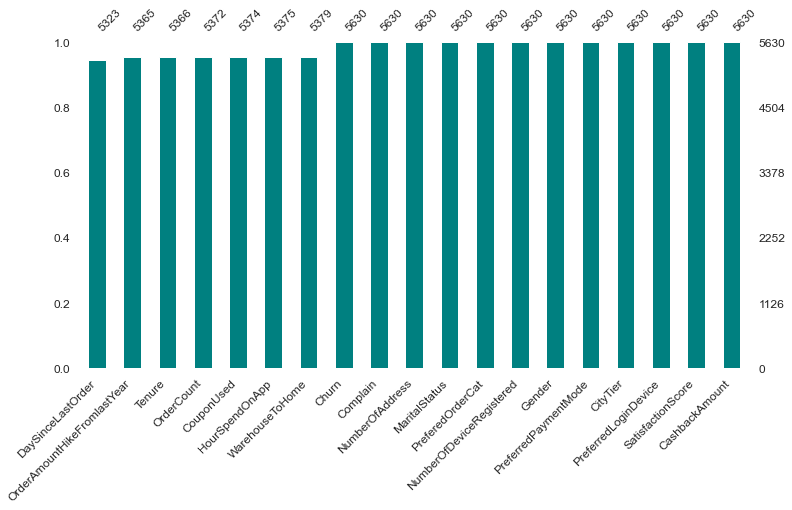

In [80]:
msno.bar(df, sort="ascending", figsize=(12,6), fontsize=12, color='teal');

Pada bar plot diatas menunjukkan bahwa variabel `DaySinceLastOrder`, `OrderAmountHikeFromlastYear`, `Tenure`, `OrderCount`, `CouponUsed`, `HourSpendOnApp`, dan `WarehouseToHome` adalah variabel-variabel yang memiliki missing values. Dari bar plot pun kita dapat mengetahui bahwa jumlah data yang hilang tidak begitu banyak (dalam rentang 250-300an data, angka lengkap ada pada tabel diatas).

**Matrix Plot**

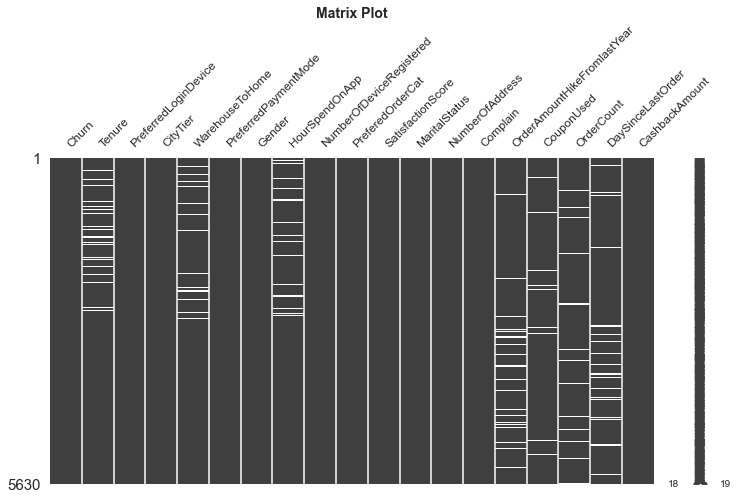

In [81]:
msno.matrix(df, figsize=(12,6), fontsize=12).set_title('Matrix Plot', size=14, weight='bold');

Matrix plot akan memberikan isian warna untuk setiap kolomnya. Apabila data ada, maka plot diarsir dalam warna abu-abu. Jika tidak ada data (missing values), maka plot ditampilkan dalam warna putih. Jika dilihat pada matrix plot diatas, terlihat bahwa pada variabel dengan missing values memiliki pola yang acak (tidak menunjukkan pola yang sama antar feature).

**Heatmap**

Heatmap digunakan untuk mengidentifikasi korelasi nullity antar variabel yang berbeda. Korelasi nullity berkisar dari -1 (jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada) hingga 0 (variabel yang muncul atau tidak muncul tidak berkorelasi satu sama lain) hingga 1 (jika nilai satu variabel ada maka nilai yang lain pasti ada).

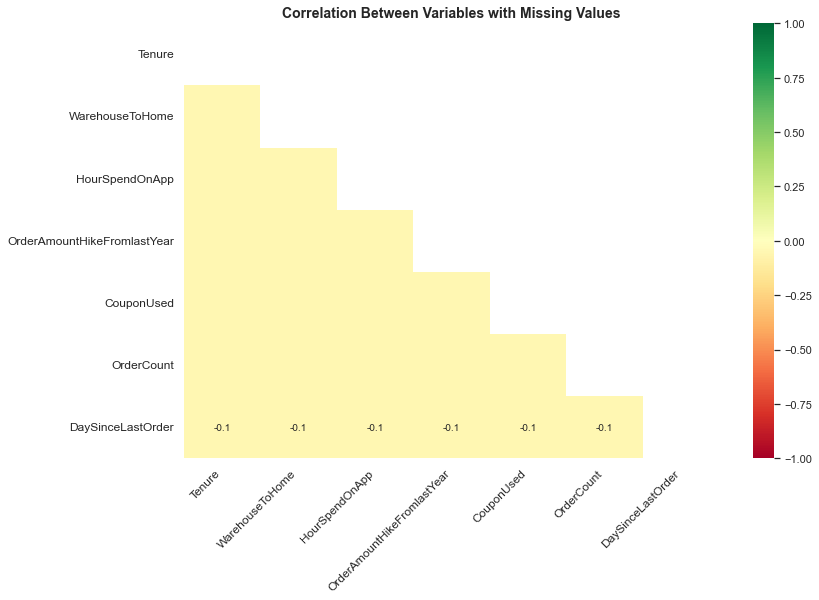

In [82]:
msno.heatmap(df, cmap="RdYlGn", figsize=(12,8), fontsize=12).set_title('Correlation Between Variables with Missing Values', size=14, weight='bold');

Pada heatmap diatas menunjukkan bahwa semua variabel yang memiliki missing values memiliki hubungan korelasi negatif yang sangat lemah (-0.1) atau tidak ada hubungan antara missing value dalam satu kolom dibandingkan dengan yang lain. Artinya apabila terdapat missing value pada satu variabel, maka tidak ditemukannya missing value pada variabel lainnya.

Sehingga dari beberapa visualisasi dari library missingno diatas, dapat disimpulkan bahwa missing value dalam dataset ini tidak saling berhubungan. Untuk proses mengisian missing value akan dijelaskan lebih lengkap pada tahap data preprocessing

### Duplicated Data

In [83]:
print('Apakah terdapat data duplikat? :','Ada' if df.duplicated().any() == True else 'Tidak ada')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Apakah terdapat data duplikat? : Ada
Jumlah data duplikat: 556


Ternyata setelah mendrop `CustomerID`, ditemukan 556 data duplikat dalam dataset. Oleh karena itu, data duplikat akan di drop pada tahap data preprocessing.

### Data Distribution

#### Churn (Target)

,class,n_churned
0,0,4682
1,1,948


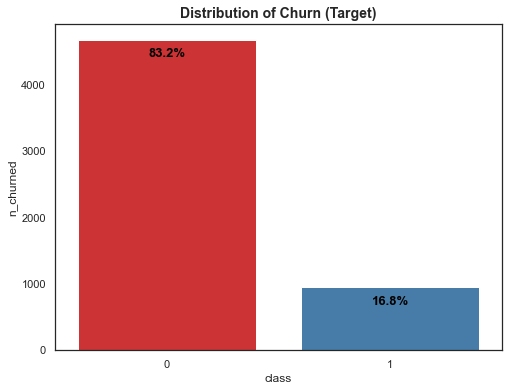

In [84]:
# Set theme dan palette untuk visualisasi
sns.set_theme(style='white', palette='Set1')

plt.figure(figsize=(8,6))
total = len(df)
ax = sns.countplot(data=df, x='Churn')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.4, p.get_height()-125), ha='center', va='top', color='black', size=13, weight='bold')
plt.title('Distribution of Churn (Target)', size=14, weight='bold')
ax.set_xlabel('class')
ax.set_ylabel('n_churned')

n_churned = pd.DataFrame(df['Churn'].value_counts()).reset_index().rename(columns={'index':'class', 'Churn':'n_churned'})
n_churned

Dalam dataset ini, kita dapat mengetahui bahwa 16.8% customer yang meninggalkan layanan ecommerce ini. Angka tersebut juga menunjukkan bahwa variable `Churn` yang sebagai target dalam modeling memiliki data yang [moderate imbalance](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=en). Data yang imbalance ini perlu ditreatment agar saat dilakukan modeling, algoritmanya tidak belajar lebih banyak hanya pada data kelas negatif saja (class 0).

#### Numerical Features

,column,skewness,pvalue score
0,Tenure,0.736513,5.186549e-86
1,WarehouseToHome,1.619154,0.000000e+00
2,DaySinceLastOrder,1.191000,4.411831e-285
3,CashbackAmount,1.149846,4.411831e-285


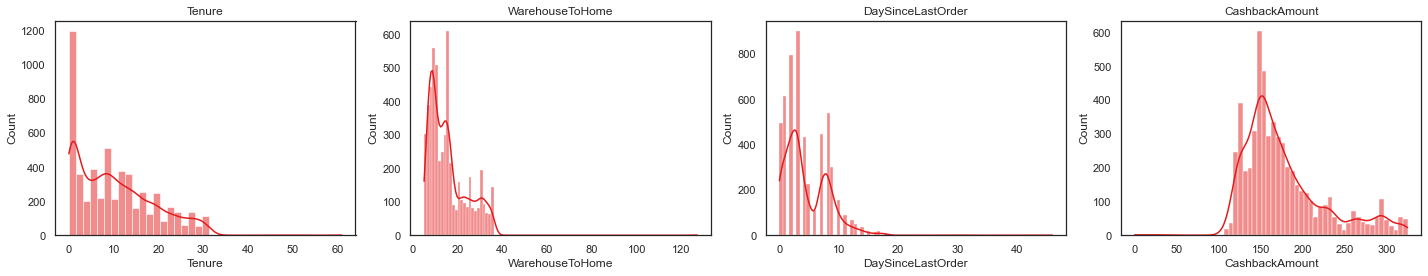

In [85]:
# Continuous variable
continuous_viz = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
fig = plt.figure(figsize=(20,4))
subplot = 1

for cont in continuous_viz:
    plt.subplot(1,4,subplot)
    sns.histplot(data=df, x=cont, kde=True)
    plt.title(cont)
    plt.tight_layout()
    subplot+=1

list_pvalue_cont = []
skew_cont = []

for cont in continuous_viz:
    if df[cont].isna().any() == True:
        s, pval = normaltest(df[cont].dropna())
        list_pvalue_cont.append(pval)
    else:
        s, pvalue = normaltest(df[cont].dropna())
        list_pvalue_cont.append(pval)
    skew_cont.append(df[cont].skew())

pvalue_cont = pd.DataFrame({'column': continuous_viz, 'skewness': skew_cont, 'pvalue score': list_pvalue_cont})
pvalue_cont

Berdasarkan visualisasi dan uji normalitas diatas, diketahui bahwa untuk data numerical variable (continuous) pada dataset tidak terdistribusi normal dan berbentuk right skew (karena nilai skew > 0). Adapun insight yg didapatkan adalah sebagai berikut:
- Pada variable `Tenure` terlihat bahwa banyak customer yang menghabiskan waktunya kurang dari dua bulan saat menggunakan ecommerce ini. Sedangkan untuk diatas dua bulan, waktu yang dihabiskan customer cenderung fluktuatif namun semakin menurun.
- Dalam variabel `WarehouseToHome` menggambarkan jarak antara gudang pengiriman milik ecommerce dengan rumah customer. Rentang jarak antara gudang dengan rumah customer beragam, dari yang paling dekat yaitu 5 km dan paling jauh hingga 127 km.
- `DaySinceLastOrder` menunjukkan jumlah hari dari terakhir customer melakukan transaksi sampai dengan waktu penarikan data ini. Rata-rata customer paling lama tidak berbelanja 4 hari untuk akhirnya melakukan transaksi belanja kembali.
- `CashbackAmount` menggambarkan rata-rata cashback yang diterima customer berdasarkan transaksi bulan lalu. Disini ditunjukkan bahwa customer paling banyak menerima cashback di rentang sekitar $150 berdasarkan transaksi bulan lalu.

,column,pvalue score
0,CityTier,4.411831e-285
1,HourSpendOnApp,3.082667e-53
2,NumberOfDeviceRegistered,3.082667e-53
3,SatisfactionScore,3.082667e-53
4,NumberOfAddress,3.082667e-53
5,Complain,3.082667e-53
6,OrderAmountHikeFromlastYear,1.129357e-101
7,CouponUsed,0.000000e+00
8,OrderCount,0.000000e+00


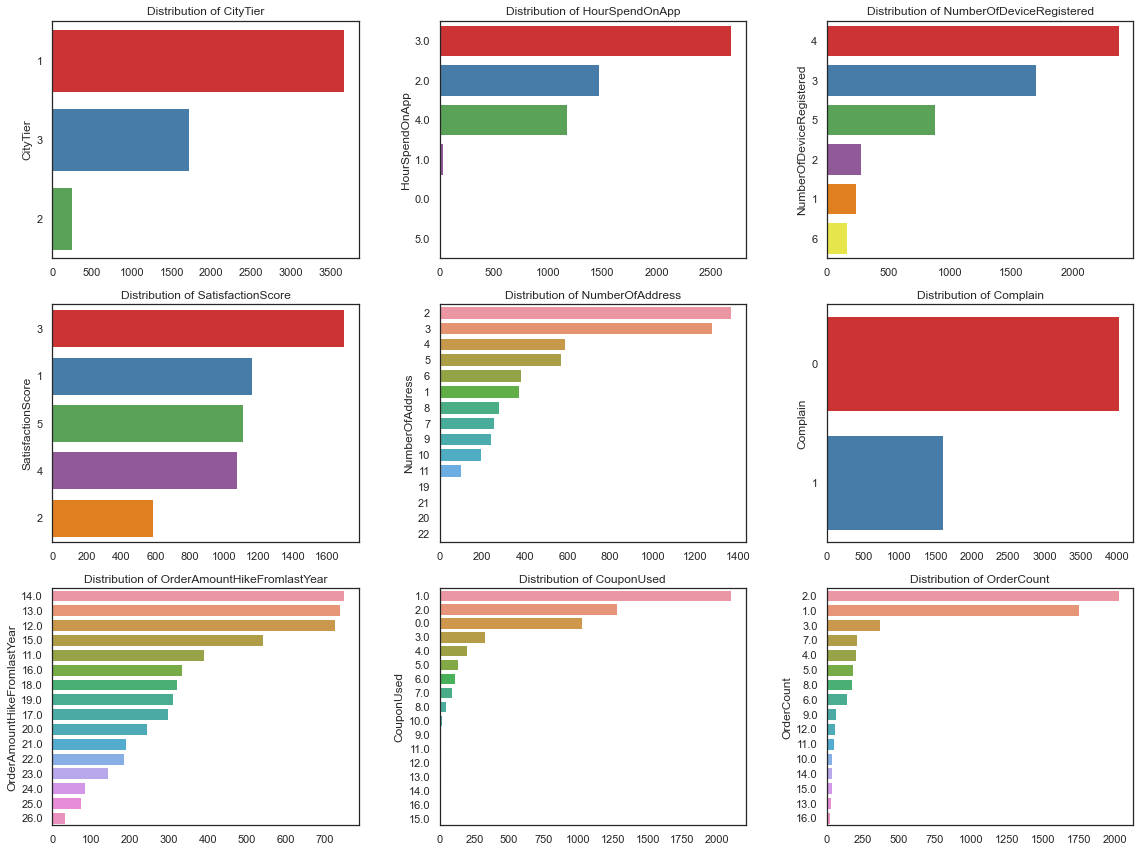

In [86]:
# Discrete variable
discrete_viz = ['CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain',\
                'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount']

fig = plt.figure(figsize=(16,12))
subplot = 1

for dis in discrete_viz:
    ax = plt.subplot(3,3,subplot)
    sns.countplot(data=df, y=dis, order=df[dis].value_counts().index)
    ax.set_title(f'Distribution of {dis}')
    ax.set_xlabel(None)
    plt.tight_layout(w_pad = 3)
    subplot+=1

list_pvalue_dis = []

for dis in discrete_viz:
    if df[dis].isna().any() == True:
        s, pval = normaltest(df[dis].dropna())
        list_pvalue_dis.append(pval)
    else:
        s, pvalue = normaltest(df[dis].dropna())
        list_pvalue_dis.append(pval)

pvalue_dis = pd.DataFrame({'column': discrete_viz,'pvalue score': list_pvalue_dis})
pvalue_dis

Untuk numerical variable (discrete), didapatkan juga bahwa datanya tidak terdistribusi normal setelah dilakukan uji normalitas. Adapun insight yang didapatkan adalah sebagai berikut:
- Customer yang menggunakan aplikasi ecommerce ini 50% berasal dari `CityTier` 1. Berdasarkan domain knowledge, `CityTier` 1 kerap diartikan sebagai kota yang maju dan berpenduduk lebih banyak dari `CityTier` di bawahnya (2, 3, dst).
- Berdasarkan `HourSpendOnApp`, customer paling banyak menghabiskan waktu selama 3 jam saat mengakses ecommerce ini.
- Dalam mengakses aplikasi ecommerce, customer paling banyak mendaftarkan 4 devicenya saat melakukan transaksinya (`NumberOfDeviceRegistered`).
- `SatisfactionScore` menunjukkan bahwa customer paling banyak memberikan score 3 (netral) terhadap kepuasan terhadap layanan ecommerce, namun di posisi kedua customer sangat tidak puas (score 1) dengan layanan dari ecommerce ini.
- Saat menggunakan aplikasi ecommerce, customer paling banyak mendaftarkan 2 alamat untuk digunakan dalam pengiriman produk yang dibeli (`NumberOfAddress`).
- `Complain` menunjukkan bahwa banyak customer yang tidak mengajukan complain (class 0) daripada yang mengajukan complain.
- Pada `OrderAmountHikeFromlastYear`, mayoritas order customer pada aplikasi ecommerce meningkat 14% dari tahun sebelumnya.
- `CouponUsed` menunjukkan bahwa customer paling banyak menggunakan 1 kupon saat melakukan transaksi di aplikasi ecommerce.
- `OrderCount` menunjukkan banyaknya order customer pada aplikasi ecommerce pada bulan lalu. Disini ditunjukkan bahwa paling banyak customer melakukan dua kali order di bulan lalu.

#### Categorical Values

In [87]:
# Menampilkan unique value dari masing-masing variabel
categorical_viz = ['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredPaymentMode']

for cat in categorical_viz:
    print(f'Unique value dari {cat} = {df[cat].unique()}')

Unique value dari PreferredLoginDevice = ['Mobile Phone' 'Phone' 'Computer']
Unique value dari Gender = ['Female' 'Male']
Unique value dari MaritalStatus = ['Single' 'Divorced' 'Married']
Unique value dari PreferedOrderCat = ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique value dari PreferredPaymentMode = ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


Setelah ditampilkannya unique value dari masing-masing categorical variabel, ditemukan terdapat value yang memiliki arti sama namun ditulis berbeda seperti contoh pada `PreferredLoginDevice` terdapat value 'Mobile Phone' dan 'Phone'. Maka untuk variabel-variabel yang memiliki pengulangan value seperti itu, maka akan kami gabungkan menjadi 1 nama value saja agar memudahkan dalam pemahaman data.

In [88]:
# Menggabungkan value-value yang memiliki arti sama dalam variabel
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'Credit Card':'CC', 'Cash on Delivery':'COD'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

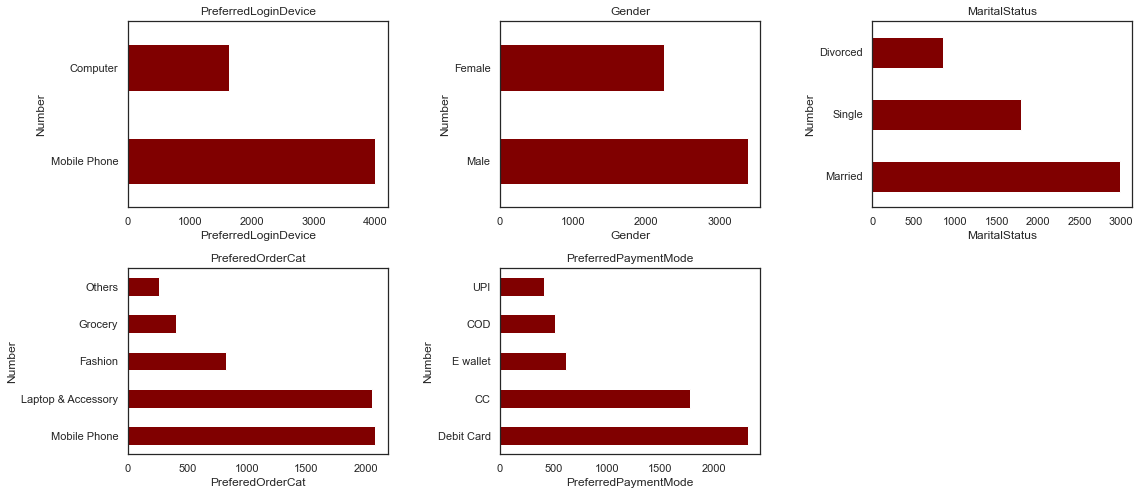

In [89]:
# Categorical variable visualization
fig = plt.figure(figsize=(16,10))
subplot = 1

for cat in categorical_viz:
    ax = plt.subplot(3,3,subplot)
    ax = df[cat].value_counts().plot(kind='barh', color=['maroon'])
    plt.ylabel('Number')
    plt.xlabel(cat)
    plt.title(cat, size=12)
    container = ax.containers[0]
    # ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='center', padding = 0, color="white", fontweight='bold')
    plt.tight_layout(w_pad = 3)
    subplot+=1

Setelah dilakukan penggabungan value yang memiliki penulisan yang mirip, maka berikut insight dari visualisasi categorical variabel:
- Customer lebih memilih untuk mengakses aplikasi ecommerce ini melalui mobile phone (`PreferredLoginDevice`).
- Untuk sistem pembayarannya, customer lebih banyak yang menggunakan Debit Card dalam transaksinya. (`PreferredPaymentMode`)
- Customer dalam data ini juga lebih banyak customer laki-laki daripada perempuan (`Gender`).
- Berdasarkan transaksi di bulan lalu, customer lebih banyak membeli Mobile Phone dan dilanjutkan dengan pembelian Laptop & Accessory (`PreferedOrderCat`).
- Pada `MaritalStatus`, customer lebih banyak yang sudah berstatus menikah daripada yang berstatus single dan bercerai.

### Data Correlation

#### Numerical Feature vs Target
Untuk dapat memahami korelasi antara feature numerical dengan target, maka dilakukanlah uji korelasi antar feature. Karena semua feature numerical tidak terdistribusi normal, maka uji korelasi akan menggunakan uji korelasi 'spearman'. Rentang hasil uji korelasi adalah dari -1 sampai dengan 1.

Kekuatan korelasi:
- 0 - 0.2: sangat lemah
- 0.2 - 0.4: lemah
- 0.4 - 0.6: moderate
- 0.6 - 0.8: kuat
- 0.8 - 1.0: sangat kuat

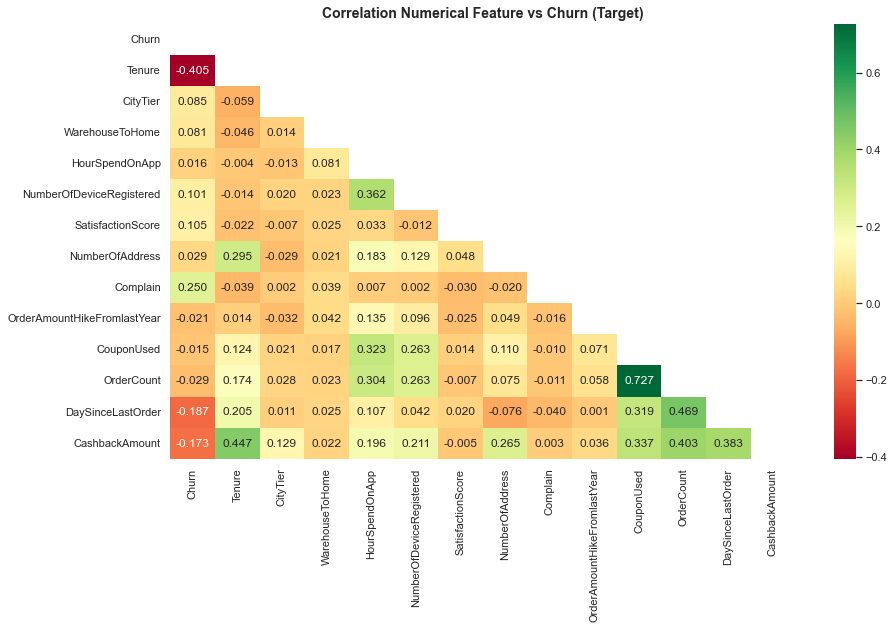

In [90]:
corr = df.corr('spearman')
plt.figure(figsize=(14,8))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, fmt='.3f', mask=matrix, cmap='RdYlGn')
plt.title('Correlation Numerical Feature vs Churn (Target)', size=14, weight='bold');

Berdasarkan heatmap correlation diatas, didapatkan bahwa korelasi `Churn` dengan numerical feature adalah sebagai berikut:
- Feature `Tenure` memiliki hubungan korelasi negatif terkuat dengan score **-0.405** dan kekuatan hubungannya moderate. Artinya diasumsikan semakin rendah tenure dari customer, maka semakin tinggi angka customer yang churn.
- Sedangkan feature `Complain` memiliki hubungan korelasi positif terkuat dengan score **0.250** dan kekuatan hubungannya lemah.
- Sedangkan feature-feature lainnya memiliki hubungan korelasi yang sangat lemah dengan score dibawah 0.2.

#### Categorical Feature vs Target

Untuk melihat menguji keterkaitan antara feature categorical dengan target, disini akan menggunakan uji chi-square. Adapun hipotesisnya sebagai berikut:
- Ho: feature categorical dan target `Churn` tidak saling terkait (independent)
- Ha: feature categorical dan target `Churn` saling terkait (dependent)

In [91]:
# Melakukan uji chi square
cat_cols = list(df.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(df[i], df['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferredLoginDevice,0.00015,dependent
1,PreferredPaymentMode,0.00000,dependent
2,Gender,0.03082,dependent
3,PreferedOrderCat,0.00000,dependent
4,MaritalStatus,0.00000,dependent


Berdasarkan hasil uji chi-square diatas, diketahui bahwa semua feature categorical memiliki chi-square score < 0.05 (berhasil menolak Ho). Artinya masing-masing feature categorical saling terkait dengan target `Churn` (proporsinya berbeda signifikan).

### Data Analysis

Setelah dibuatkannya visualisasi atas distribusi data dan korelasi data antar variabel, selanjutnya akan dilakukan data analisis. Sebelum dilakukan analisis, kami memiliki asumsi-asumsi terkait analisis customer churn ini. Adapun asumsi kami akan dituangkan dalam beberapa pertanyaan sebagai berikut:
- Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan?
- Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce?
- Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi?
- Apakah customer yang keluar dari layanan ecommerce tidak lagi melakukan order pembelanjaan seminggu terakhir?
- Bagaimana pembelian produk dari customer yang churn? Apakah berpengaruh dari cashback yang didapatkan?
- Apakah ada metode pembayaran tertentu yang berhubungan dengan customer churn?
- Apakah customer yang login menggunakan handphone lebih banyak yang berhenti dari layanan ecommerce?
- Apakah customer laki-laki dan customer yang sudah menikah yang lebih banyak berhenti dari layanan ecommerce?

**Apakah customer yang berhenti menggunakan langganan ecommerce berhenti di awal bulan penggunaan layanan?**

Churn,0,1,Total,Churn %
Tenure,,,,
0.0,236.0,272.0,508.0,53.5
1.0,341.0,349.0,690.0,50.6
2.0,153.0,14.0,167.0,8.4
3.0,177.0,18.0,195.0,9.2
4.0,183.0,20.0,203.0,9.9


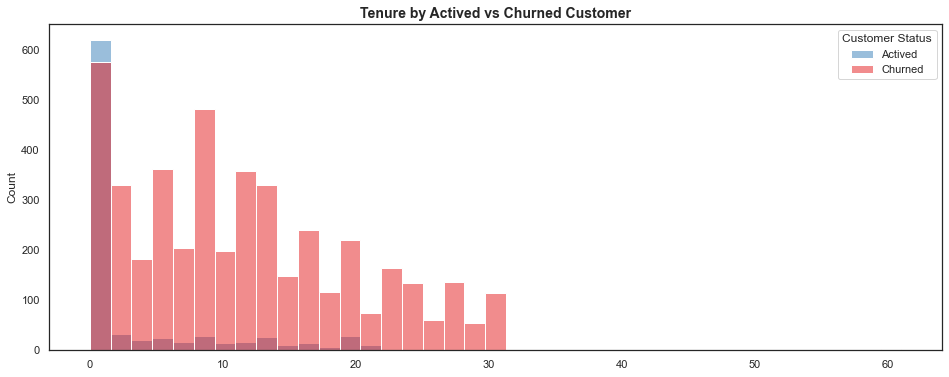

In [92]:
# Function untuk crosstab table
def crosstab_viz(col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.loc['Total'] = crosstab.sum()
    crosstab.loc[f'{col1} %'] = round(crosstab.loc[1] / crosstab.loc['Total'] * 100, 1)
    return crosstab

plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='Tenure', hue='Churn')
ax.set_title('Tenure by Actived vs Churned Customer', size=14, weight='bold')
ax.set_xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'])

crosstab_viz('Churn', 'Tenure').T.head(5)

Karena `Tenure` berkorelasi negatif terkuat dengan `Churn`, maka dengan visualisasi histogram diatas kita mengetahui bahwa angka penggunaan layanan ecommerce meningkat di bawah 2 bulan. Hal ini dapat diasumsikan karena customer tertarik di awal dengan layanan yang disuguhkan ecommerce tersebut. Namun jika kita lihat berdasarkan `Churn`, ternyata asumsi di awal benar dimana angka customer yang berhenti menggunakan layanan ecommerce di bawah 2 bulan lebih tinggi daripada periode lainnya. Jika dilihat dari table,  persentase customer yang berhenti menggunakan layanan ecommerce lebih dari 50% dari total user di bawah 2 bulan tersebut. Customer churn di awal periode seperti itu dapat disebut sebagai early-life churn. Berdasarkan [domain knowledge]((https://www.cartesian.com/monitoring-and-mitigating-early-life-churn/)), pada periode awal penggunaan suatu layanan, customer kerap berhenti dari layanan tersebut karena berbagai hal, seperti:
- Support customer yang tidak memuaskan (kadang hingga tidak menyelesaikan permasalahan),
- Ketersediaan produk dalam ecommerce,
- Kualitas layanan ecommerce (misal proses pembayaran, proses pengiriman), dan lainnya.

**Apakah customer yang mengajukan complain cenderung berhenti menggunakan layanan ecommerce?**

Complain,0,1
Churn,,
0,3586.0,1096.0
1,440.0,508.0
Total,4026.0,1604.0
Churn %,10.9,31.7


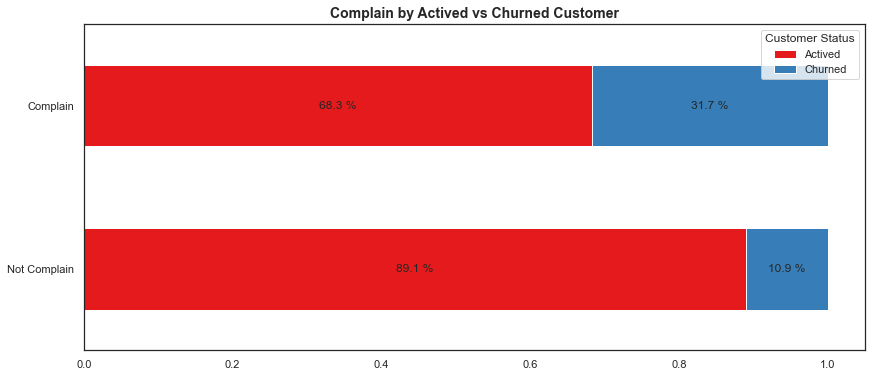

In [93]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
complain_churn = df.groupby('Complain')['Churn'].value_counts(normalize=True).unstack('Churn')
complain_churn.plot.barh(stacked=True, ax = ax)
plt.title('Complain by Actived vs Churned Customer', size=14, weight='bold')
plt.yticks(ticks=[0, 1], labels=['Not Complain', 'Complain'], rotation=0)
plt.ylabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='upper right')

for ix, row in complain_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix, 
                    f"{int(round(element,3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'Complain')

Kemudian untuk feature `Complain` yang berkorelasi positif terkuat dengan `Churn` menunjukkan bahwa berdasarkan pengajuan complain dari customer, proporsi customer yang mengajukan complain lebih tinggi untuk berhenti menggunakan layanan ecommerce sebesar 31.7% daripada yang tidak mengajukan complain. Hal ini sejalan dengan asumsi diawal dimana customer yang complain cenderung lebih tinggi untuk churn dari ecommerce. Kita ketahui bahwa customer yang mengajukan complain adalah customer yang kerap mengalami ketidakpuasan dalam layanan yang diberikan sehingga sangat dimungkinkan customer menjadi beralih ke kompetitor.

**Apakah angka kepuasan yang rendah akan menunjukkan tingkat churn yang tinggi?**

SatisfactionScore,1,2,3,4,5
Churn,,,,,
0,1030.0,512.0,1406.0,890.0,844.0
1,134.0,74.0,292.0,184.0,264.0
Total,1164.0,586.0,1698.0,1074.0,1108.0
Churn %,11.5,12.6,17.2,17.1,23.8


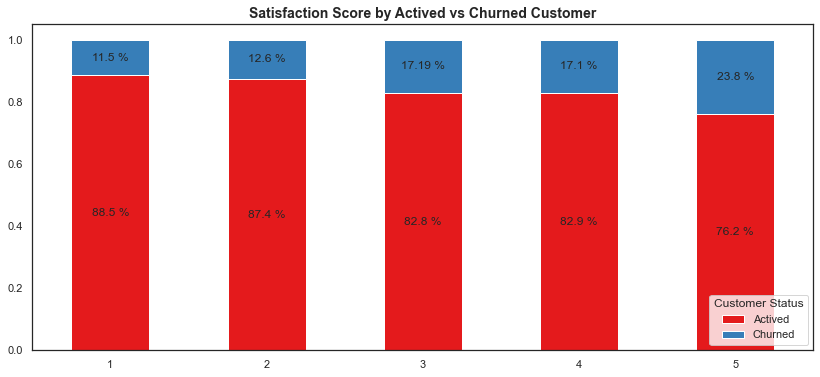

In [94]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
satisfaction_churn = df.groupby('SatisfactionScore')['Churn'].value_counts(normalize=True).unstack('Churn')
satisfaction_churn.plot.bar(stacked=True, ax= ax)
plt.title('Satisfaction Score by Actived vs Churned Customer', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')

for ix, row in satisfaction_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(round(element, 3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'SatisfactionScore')

Jika dilihat dari angka kepuasan pelanggan, kita dapat mengetahui bahwa ternyata customer yang memberikan score 5 justru yang paling banyak berhenti dari layanan ecommerce. Sebaliknya, customer yang memberikan score 1 lebih sedikit yang churn. Hal ini membantah asumsi di awal dimana diperkirakan customer yang memberikan score 1 akan menunjukkan tingkat churn yang tinggi daripada customer yang memberikan score diatas 1. Namun hal ini serupa dengan case di dunia nyata dimana customer yang memberikan score kepuasan 1 mungkin saja tetap menggunakan ecommerce dan yang memberikan score kepuasan 5 justru mungkin saja keluar dari layanan ecommerce.

DaySinceLastOrder,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,30.0,31.0,46.0
Churn,,,,,,,,,,,,,,,,,,,,,,
0,326.0,432.0,670.0,770.0,373.0,200.0,97.0,382.0,472.0,271.0,147.0,83.0,67.0,51.0,31.0,15.0,13.0,17.0,10.0,1.0,1.0,0.0
1,170.0,182.0,122.0,130.0,58.0,28.0,16.0,65.0,66.0,28.0,10.0,8.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
Total,496.0,614.0,792.0,900.0,431.0,228.0,113.0,447.0,538.0,299.0,157.0,91.0,69.0,51.0,35.0,19.0,13.0,17.0,10.0,1.0,1.0,1.0
Churn %,34.3,29.6,15.4,14.4,13.5,12.3,14.2,14.5,12.3,9.4,6.4,8.8,2.9,0.0,11.4,21.1,0.0,0.0,0.0,0.0,0.0,100.0


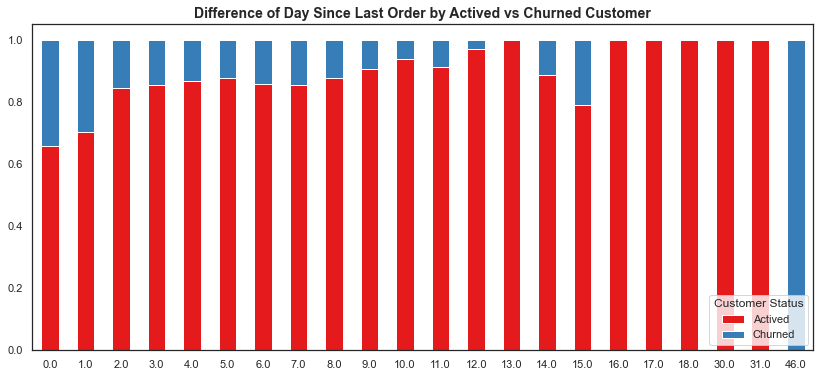

In [95]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
order_churn = df.groupby('DaySinceLastOrder')['Churn'].value_counts(normalize=True).unstack('Churn')
order_churn.plot.bar(stacked=True, ax = ax)
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')
plt.title('Difference of Day Since Last Order by Actived vs Churned Customer', size=14, weight='bold');

pd.set_option('display.max_columns', None)
crosstab_viz('Churn', 'DaySinceLastOrder')

Selanjutnya untuk periode transaksi, jika dilihat dari feature `DaySinceLastOrder` dapat dilihat bahwa customer yang keluar dari layanan ecommerce masih melakukan aktivitas pembelanjaan hingga hari ke 7 sampai dengan saat terakhir data ini diambil. Hal ini diperkuat dengan proporsi customer yang churn masih cukup banyak yang berbelanja di `DaySinceLastOrder` 0 dan 1. Hanya ada sedikit customer yang churn yang `DaySinceLastOrder`-nya di rentang > 10 hari. Artinya walaupun customer masih rutin berbelanja ternyata customer akan tetap memutuskan untuk keluar dari layanan ecommerce. Hal ini membantah asumsi di awal bahwa customer yang churn masih melakukan transaksi selama seminggu terakhir.

PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile Phone,Others
Churn,,,,,
0,698.0,390.0,1840.0,1510.0,244.0
1,128.0,20.0,210.0,570.0,20.0
Total,826.0,410.0,2050.0,2080.0,264.0
Churn %,15.5,4.9,10.2,27.4,7.6


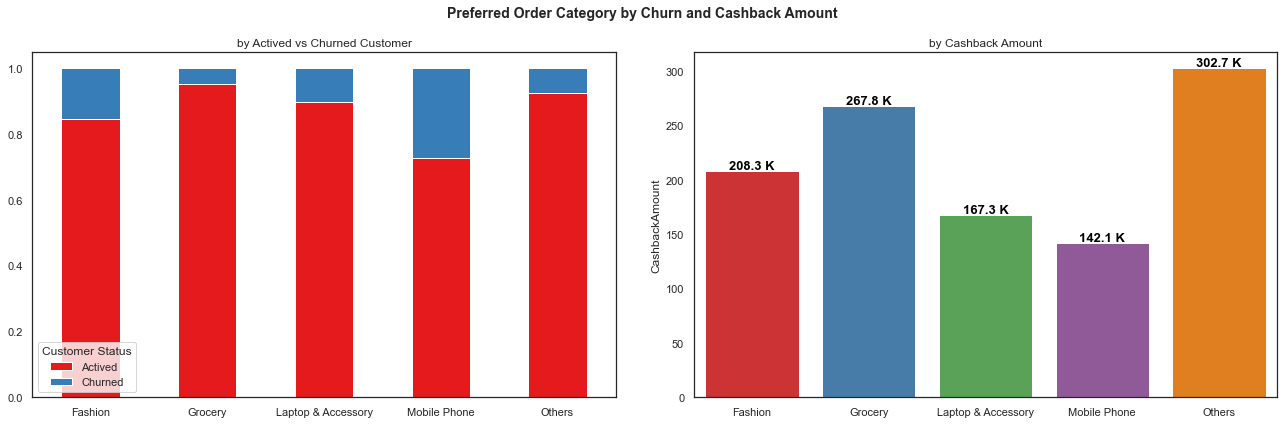

In [96]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Preferred Order Category by Churn and Cashback Amount', size=14, weight='bold')

ax = plt.subplot(1,2,1)
df.groupby('PreferedOrderCat')['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True, ax=ax).set_title('by Actived vs Churned Customer')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower left')

ax = plt.subplot(1,2,2)
lb = sns.barplot(data=df, x='PreferedOrderCat', y='CashbackAmount', estimator=np.median, ci=0, ax=ax, order=df.groupby('PreferedOrderCat').median().index)
for p in lb.patches:
    lb.annotate(f'{round(p.get_height(), 1)} K', (p.get_x()+0.4, p.get_height()+10), ha='center', va='top', color='black', size=13, weight='bold')
plt.title('by Cashback Amount')
plt.xlabel(None)
plt.tight_layout(w_pad=3)

crosstab_viz('Churn', 'PreferedOrderCat')

Kemudian berdasarkan `PreferedOrderCat` menunjukkan bahwa 27.4% customer yang membeli mobile phone paling banyak berujung keluar dari layanan ecommerce daripada customer yang berbelanja kategori lainnya. Jika coba ditelaah berdasarkan cashback yang diterima, customer yang membeli mobile phone pun mendapatkan cashback paling rendah daripada kategori produk lainnya. Sedangkan customer yang membeli laptop dan accessory (produk tersier lainnya) menunjukkan jumlah customer churn yang sedikit namun cashback yang diterima customer lebih tinggi 25.2k dari cashback pembelian mobile phone. Sehingga hal ini dapat diasumsikan bahwa pembeli mobile phone tidak menerima lebih banyak cashback saat melakukan transaksi sehingga customer menganggap kurang menguntungkan dalam membeli produk tersebut. Oleh karena itu, dapat dipertimbangkan untuk diberikannya cashback lebih besar untuk user pembeli mobile phone agar dapat mengurangi jumlah customer yang churn.

PreferredPaymentMode,CC,COD,Debit Card,E wallet,UPI
Churn,,,,,
0,1522.0,386.0,1958.0,474.0,342.0
1,252.0,128.0,356.0,140.0,72.0
Total,1774.0,514.0,2314.0,614.0,414.0
Churn %,14.2,24.9,15.4,22.8,17.4


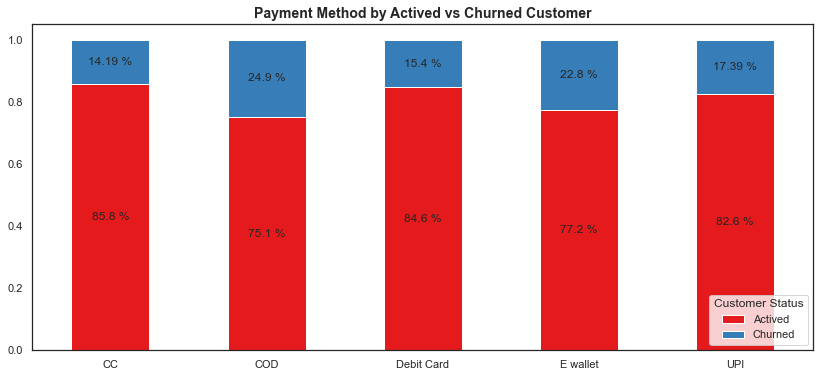

In [97]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
payment_churn = df.groupby('PreferredPaymentMode')['Churn'].value_counts(normalize=True).unstack('Churn')
payment_churn.plot.bar(stacked=True, ax= ax)
plt.title('Payment Method by Actived vs Churned Customer', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')

for ix, row in payment_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(round(element, 3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'PreferredPaymentMode')

Jika dilihat dari metode pembayarannya (`PreferredPaymentMode`), 24.9% customer yang melakukan pembayaran menggunakan metode COD (Cash On Delivery) berujung keluar dari layanan ecommerce. Meskipun pembayaran COD memudahkan bagi customer untuk "menahan" uangnya terlebih dahulu sebelum menerima barang yang dibeli daripada membayarnya di awal, namun pembayaran COD [dapat menyulitkan](https://www.versapay.com/resources/cod-part-1-whats-wrong-with-cash-on-delivery) customer jika customer ingin mengembalikan barang apa pun setelah membayarnya. Hal ini dapat terjadi karena penjual mungkin tidak berkewajiban untuk menerima pengembalian tersebut, sehingga ini dapat menjadi alasan complain customer yang berujung churn apabila tidak tertangani dengan baik.

PreferredLoginDevice,Computer,Mobile Phone
Churn,,
0,1310.0,3372.0
1,324.0,624.0
Total,1634.0,3996.0
Churn %,19.8,15.6


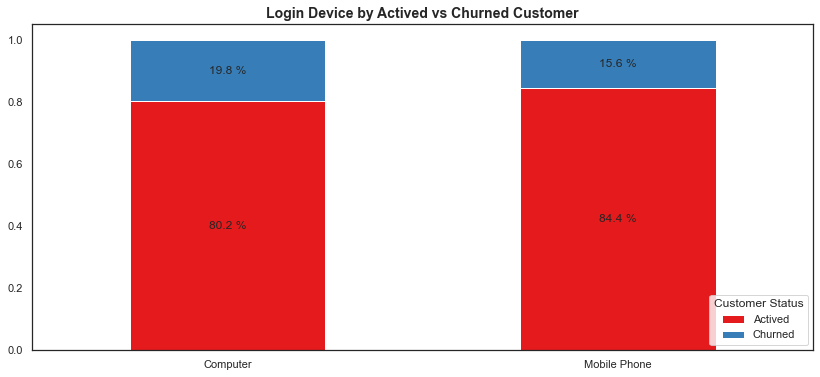

In [98]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
device_churn = df.groupby('PreferredLoginDevice')['Churn'].value_counts(normalize=True).unstack('Churn')
device_churn.plot.bar(stacked=True, ax= ax)
plt.title('Login Device by Actived vs Churned Customer', size=14, weight='bold')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')

for ix, row in device_churn.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(round(element, 3) * 10000)/100} %",
                    va="center",
                    ha="center",
                )
            cumulative += element

crosstab_viz('Churn', 'PreferredLoginDevice')

Kemudian berdasarkan device yang digunakan untuk login ke aplikasi ecommerce, customer yang login menggunakan computer 4.2% lebih banyak untuk churn daripada customer yang login menggunakan handphonenya. Hal ini bisa saja disebabkan oleh user experience yang kurang menyenangkan bagi customer yang mengakses ecommerce melalui computer. Namun hal ini akan lebih baik jika dilakukan cohort analysis untuk melihat banyaknya user login (baik yang menggunakan computer maupun handphone) berdasarkan periode tertentu.

Gender,Female,Male
Churn,,
0,1898.0,2784.0
1,348.0,600.0
Total,2246.0,3384.0
Churn %,15.5,17.7


MaritalStatus,Divorced,Married,Single
Churn,,,
0,724.0,2642.0,1316.0
1,124.0,344.0,480.0
Total,848.0,2986.0,1796.0
Churn %,14.6,11.5,26.7


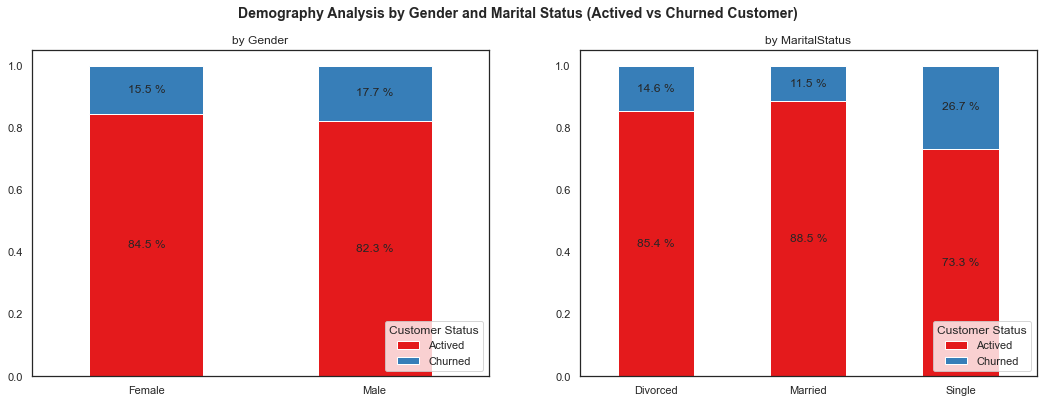

In [99]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Demography Analysis by Gender and Marital Status (Actived vs Churned Customer)', size=14, weight='bold')
demography = ['Gender', 'MaritalStatus']
subplot = 1

for i in demography:
    ax = plt.subplot(1,2,subplot)
    demo_churn = df.groupby(i)['Churn'].value_counts(normalize=True).unstack('Churn')
    demo_churn.plot.bar(stacked=True, ax= ax)
    plt.title(f'by {i}')
    plt.xticks(rotation=0)
    plt.xlabel(None)
    plt.legend(title='Customer Status', labels=['Actived', 'Churned'], loc='lower right')

    for ix, row in demo_churn.reset_index(drop=True).iterrows():
            cumulative = 0
            for element in row:
                if element > 0.1:
                    plt.text(
                        ix,
                        cumulative + element / 2,
                        f"{int(round(element, 3) * 10000)/100} %",
                        va="center",
                        ha="center",
                    )
                cumulative += element
    subplot +=1

display(crosstab_viz('Churn', 'Gender'), crosstab_viz('Churn', 'MaritalStatus'))

Data demografi biasanya menjadi salah satu faktor penting untuk market segmentation untuk memberikan informasi yang tepat guna mengajak customer untuk berbelanja. Jika kita lihat berdasarkan data demografinya (`MaritalStatus` dan `Gender`) menunjukkan bahwa customer laki-laki 2.2% sedikit lebih banyak yang berhenti dari layanan ecommerce daripada customer perempuan. Hal ini sesuai dengan asumsi awal bahwa laki-laki yang lebih banyak churn daripada perempuan. [Studi terbaru](https://journal.sbm.itb.ac.id/index.php/ProceedingSBMITB/article/download/4673/1731) menunjukkan bahwa laki-laki memiliki niat berbelanja online lebih tinggi daripada perempuan, didukung dengan laki-laki memiliki tingkat kenyamanan yang tinggi dalam menggunakan teknologi. Apabila seperti itu, maka perlu upaya lebih tinggi untuk membuat customer laki-laki lebih lama bertahan menggunakan layanan ecommerce ini dengan harapan lebih banyak berbelanja dan lebih banyak mendatangkan keuntungan bagi perusahaan

Sedangkan 26.7% customer berstatus single adalah customer yang paling banyak berhenti dari layanan ecommerce daripada yang sudah menikah maupun yang bercerai. Hal ini ternyata membantah asumsi di awal dimana sebelumnya secara distribusi data, lebih banyak customer yang sudah menikah daripada yang berstatus single dan bercerai dalam dataset.

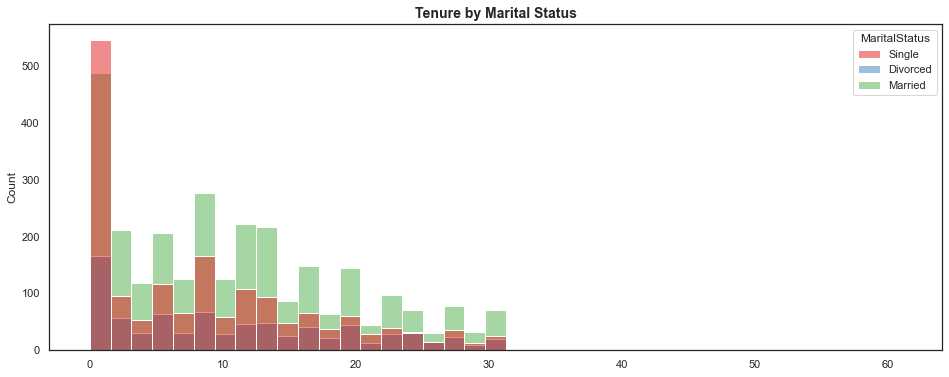

In [100]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x='Tenure', hue='MaritalStatus')
ax.set_title('Tenure by Marital Status', size=14, weight='bold')
ax.set_xlabel(None);

Menambahkan dari visualisasi diatas, jika dilihat dari `Tenure`-nya, customer yang single pun adalah customer yang banyak menggunakan layanan ecommerce ini dibawah 2 bulan. Seperti analisa diatas antara `Tenure` vs `Churn`, hal ini dimungkinkan apabila customer single adalah customer yang masih berusia produktif (misal. 20-35 tahun, tidak ada feature umur dalam dataset), maka customer yang single masih mencoba-coba layanan ecommerce ini. Ditambah customer berusia produktif biasanya lebih melek teknologi daripada customer yang lebih tua sehingga memudahkan untuk mencoba-coba layanan ecommerce yang ada. Sehingga apabila tidak puas, maka customer single akan lebih mudah berpindah ke ecommerce kompetitor.

## Data Cleaning

### Delete Duplicated Values

In [101]:
df=df.drop_duplicates()

### Drop Outliers
Drop outlier dilakukan agar mendapatkan hasil modeling yang terbaik.
Drop outlier dilakukan sebanyak 1-3 kali yang nanti pada akhirnya dipilih pemberlakuan drop outlier yang paling tepat untuk tingkat akurasi model yang paling tinggi.

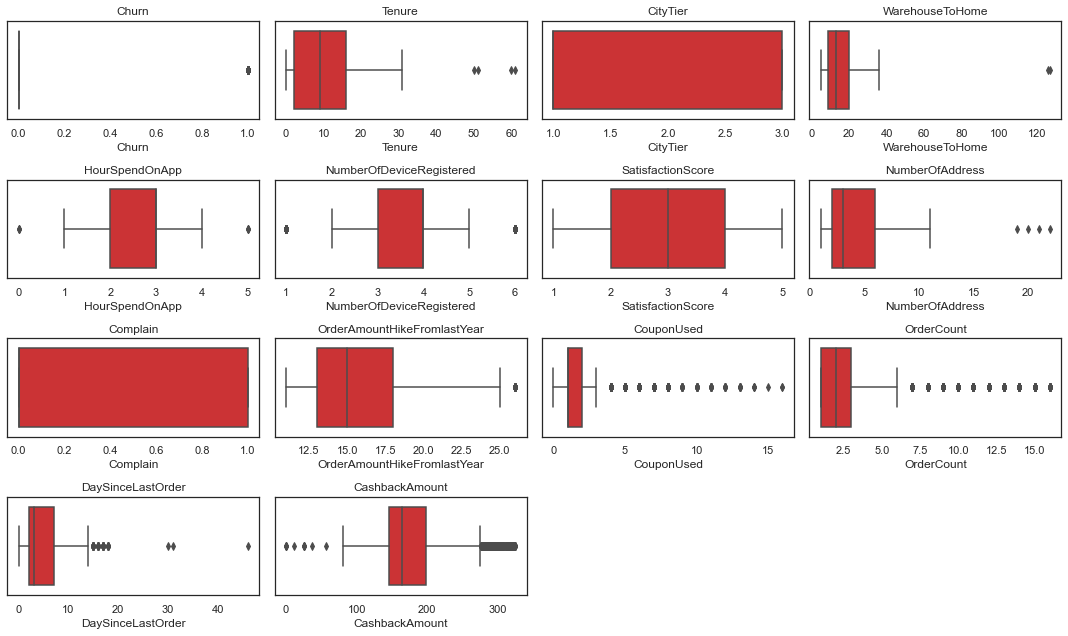

In [102]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [103]:
def outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    limit=iqr*1.5
    print(f'IQR: {iqr}')
    upperlimit=q3+limit
    lowerlimit=q1-limit
    print(f'Upper Limit: {upperlimit}')
    print(f'Lower Limit: {lowerlimit}')

In [104]:
#Buang Outlier 1
# Outliers in Tenure
outlier(df['Tenure'])
# Outliers in WarehouseToHome
outlier(df['WarehouseToHome'])
# Outliers in HourSpendOnApp 
outlier(df['HourSpendOnApp'])
# Outliers in NumberOfDeviceRegistered 
outlier(df['NumberOfDeviceRegistered'])
# Outliers in NumberOfAddress 
outlier(df['NumberOfAddress'])
# Outliers in OrderAmountHikeFromlastYear 
outlier(df['OrderAmountHikeFromlastYear'])
# Outliers in CouponUsed 
outlier(df['CouponUsed'])
# Outliers in OrderCount 
outlier(df['OrderCount'])
# Outliers in DaySinceLastOrder 
outlier(df['DaySinceLastOrder'])
# Outliers in CashbackAmount 
outlier(df['CashbackAmount'])

df=df[df['Tenure']<37]

df=df[df['WarehouseToHome']<36.5]

df=df[df['HourSpendOnApp']<4.5]
df=df[df['HourSpendOnApp']>0.5]

df=df[df['NumberOfDeviceRegistered']<5.5]
df=df[df['NumberOfDeviceRegistered']>1.5]

df=df[df['NumberOfAddress']<12]

df=df[df['OrderAmountHikeFromlastYear']<25.5]

df=df[df['CouponUsed']<3.5]

df=df[df['OrderCount']<6]

df=df[df['DaySinceLastOrder']<14.5]

df=df[df['CashbackAmount']<276.0025]
df=df[df['CashbackAmount']>67.8625]

IQR: 14.0
Upper Limit: 37.0
Lower Limit: -19.0
IQR: 11.0
Upper Limit: 36.5
Lower Limit: -7.5
IQR: 1.0
Upper Limit: 4.5
Lower Limit: 0.5
IQR: 1.0
Upper Limit: 5.5
Lower Limit: 1.5
IQR: 4.0
Upper Limit: 12.0
Lower Limit: -4.0
IQR: 5.0
Upper Limit: 25.5
Lower Limit: 5.5
IQR: 1.0
Upper Limit: 3.5
Lower Limit: -0.5
IQR: 2.0
Upper Limit: 6.0
Lower Limit: -2.0
IQR: 5.0
Upper Limit: 14.5
Lower Limit: -5.5
IQR: 52.03999999999999
Upper Limit: 276.01
Lower Limit: 67.85000000000001


In [105]:
# #Buang Outlier 2

# # Outliers in OrderCount 
# outlier(df['OrderCount'])
# # Outliers in DaySinceLastOrder 
# outlier(df['DaySinceLastOrder'])
# # Outliers in CashbackAmount 
# outlier(df['CashbackAmount'])


# df=df[df['OrderCount']<3.5]

# df=df[df['DaySinceLastOrder']<9.5]

# df=df[df['CashbackAmount']<217.385]
# df=df[df['CashbackAmount']>106.465]

In [106]:
# #Buang Outlier 3

# # Outliers in DaySinceLastOrder 
# outlier(df['DaySinceLastOrder'])

# df=df[df['DaySinceLastOrder']<7]

### Clean Data

In [107]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,1,0.0,Mobile Phone,1,11.0,COD,Male,2.0,3,Mobile Phone,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
13,1,0.0,Mobile Phone,1,15.0,CC,Male,3.0,4,Mobile Phone,3,Divorced,1,1,17.0,0.0,1.0,0.0,133.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,0,14.0,Mobile Phone,1,9.0,CC,Female,4.0,4,Mobile Phone,3,Married,4,0,15.0,1.0,2.0,3.0,145.01
5619,0,3.0,Mobile Phone,1,20.0,UPI,Male,3.0,5,Laptop & Accessory,4,Married,6,1,14.0,1.0,2.0,4.0,165.25
5624,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42


In [108]:
df['Churn'].value_counts()

0    2152
1     418
Name: Churn, dtype: int64

## Data Preprocessing

Data akan di encoding untuk fitur-fitur kategorikal & di impute/drop untuk fitur-fitur yang memiliki missing value. Skenario preprocessing yang terbaik akan untuk tingkat akurasi model tertinggi yang nanti akan dipilih.

In [109]:
# pip install category_encoders

In [110]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

### Data Preprocessing 1
Untuk skenario pertama kita akan drop missing value yang ada lalu fitur-fitur kartegorikal akan dilakukan one hot encoding dikarenakan fitur-fitur tersebut  tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [111]:
# df.dropna(inplace=True)

In [112]:
# Skenario 1 (Missing Value di Drop)
transformer1 = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = "ignore"), ['PreferredLoginDevice',
       'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus']),
], remainder='passthrough')

### Data Preprocessing 2
Untuk skenario kedua kita akan impute missing value yang ada dengan menggunakan iterative imputer. Lalu fitur-fitur kartegorikal akan dilakukan one hot encoding dikarenakan fitur-fitur tersebut  tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [113]:
#skenario 2 (Missing Value di Input)
transformer2 = ColumnTransformer([
    ('imp_iter', IterativeImputer(),['DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'Tenure', 'OrderCount', 'CouponUsed', 'HourSpendOnApp', 'WarehouseToHome']),
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = "ignore"), ['PreferredLoginDevice',
       'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus']),
], remainder='passthrough')

### Data Preprocessing 3
Untuk skenario ketiga kita akan impute missing value yang ada dengan menggunakan kombinasi antara iterative imputer dan simple imputer. Simple imputer akan diisi rata-rata dengan kolom yang memiliki korelasi. Lalu fitur-fitur kartegorikal akan dilakukan one hot encoding dikarenakan fitur-fitur tersebut  tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [114]:
#skenario 3 (Missing Value di Input)
transformer3 = ColumnTransformer([
    ('imp_simp_tenure',SimpleImputer(fill_value=df.groupby('Churn')['Tenure'].mean()),['Tenure']), #-0.405
    ('imp_simp_ordercount',SimpleImputer(fill_value=df.groupby('CouponUsed')['OrderCount'].mean().round(0)),['OrderCount']), #0.727
    ('imp_simp_couponused',SimpleImputer(fill_value=df.groupby('OrderCount')['CouponUsed'].mean().round(0)),['CouponUsed']), #0.727
    ('imp_simp_day',SimpleImputer(fill_value=df.groupby('OrderCount')['DaySinceLastOrder'].mean().round(0)),['DaySinceLastOrder']), #0.469
    ('imp_simp_hour',SimpleImputer(fill_value=df.groupby('NumberOfDeviceRegistered')['HourSpendOnApp'].mean().round(0)),['HourSpendOnApp']), #0.362
    ('imp_iter', IterativeImputer(),['OrderAmountHikeFromlastYear' , 'WarehouseToHome']),
    ('One Hot', OneHotEncoder(drop='first',handle_unknown = "ignore"), ['PreferredLoginDevice',
       'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus']),
], remainder='passthrough')

## Modeling

In [115]:
# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, make_scorer, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [116]:
# Define X and Y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [117]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [118]:
# testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
# testing.head()

In [119]:
# Classification Models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [120]:
# Scalers
robust = RobustScaler()
minmax = MinMaxScaler()
standard = StandardScaler()

Model Benchmark

In [121]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

f2_score = make_scorer(fbeta_score,beta=2)

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer3),
        ('scaler', robust),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean F2':rata,'sdev':std}).set_index('model').sort_values(by='mean F2',ascending=False)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
 

,mean F2,sdev
model,,
LightGBM,0.784921,0.055674
XGBoost,0.777521,0.043133
Decision Tree,0.715422,0.038675
Random Forest,0.703324,0.060253
Logistic Regression,0.587486,0.041565
KNN,0.352136,0.035020


Metric yang akan digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah klasifikasi kali adalah dengan F2 score.

F2 Score adalah metric klasifikasi yang menggunakan pemberatan rata-rata harmonis dari precission dan recall. Berbeda dengan F1 score yang memberikan bobot seimbang pada precission dan recall, F2 score lebih menitikberatkan/ memberikan bobot kepada 'recall' daripada 'precission'.

Penggunaan F2 score sebagai metric dari model yang dipakai, sejalan dengan business model yang sudah dijelaskan di awal.

Dari semua model benchmark yang di analisa, terlihat bahwa LightGBM dan Decision Tree memikiki  meannya yang lebih tinggi dibandingkan dengan model lainnya, dimana semakin tinggi mean, akan semakin bagus model, begitu juga dengan standard deviasi dari kedua model yang cukup stabil, karena semakin kecil standard deviasi nya, maka semakin stabil modelnya.

Predict To Test Set

In [122]:
models = [dt,lgbm]
score_f2 = []

for i in models:
    estimator=Pipeline([
        ('preprocess',transformer3),
        ('scaler', robust),
        ('model',i)])
    
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    score_f2.append(fbeta_score(y_test, y_pred,beta=2))

score_before_tuning = pd.DataFrame({'Models':models,'F2_score':score_f2})
score_before_tuning

,Models,F2_score
0,DecisionTreeClassifier(),0.817757
1,LGBMClassifier(),0.849282


Ketika di predict ke test set, performa LGBM Classifier memiliki F2 Score yang lebih baik daripada Decission Tree Classifier. 

In [123]:
ros = RandomOverSampler(random_state=0)

## Hyperparameter Tuning


Karena model LGBM Classifier memiliki performa yang lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model LGBM Classifier ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model LGBM Classifier dengan harapan dapat meningkatkan performa model. 

LightGBM CLassifier framework Gradient Boosting yang menggunakan algoritma 'tree-based'. Algoritma ini di desain untuk efisien dan dengan beberapa kelebihan:

- Kecepatan 'training' yang lebih cepat dan memiliki efisiensi yang tinggi
- Penggunaan memori yang lebih sedikit
- Accuracy yang lebih baik
- Mendukung pembelajaran GPU, parallel, dan terdistribusi. 
- Mampu untuk mengolah data dalam skala yang besar

Berdasarkan dokumentasi dari https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

Berikut beberapa parameter yang akan kita coba:

- **max_depth**  =  This parameter is an integer that controls the maximum distance between the root node of each tree and a leaf node. Decrease max_depth to reduce training time.
- **num_leaves** (min_split_loss) = max number of leaves in one tree.
- **min_data_in_leaf** = Minimum number of observations that must fall into a tree node for it to be added.
- **num_iterations** = parameter controls the number of boosting rounds that will be performed.
- **learning rate** = shrinkage rate to prevents overfitting.

In [124]:
# Random Search
model_pipe_LightGBM = Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer3),
    ('scaler',robust),
    ('model', lgbm)
])

hyperparam_space={
    'model__max_depth': list(np.arange(1, 31)),
    'model__num_leaves':list(np.arange(2,900,5)),
    'model__min_data_in_leaf': list(np.arange(10,101,2)),
    'model__num_iterations':list(np.arange(10,101,2)),
    'model__learning_rate': list(np.arange(0.1,1,0.01)),
    'model__random_state': [0]
}

random_lgbm = RandomizedSearchCV(
    estimator = model_pipe_LightGBM,
    param_distributions=hyperparam_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    n_iter=1000,
    random_state=0,
    error_score ='raise'
)

random_lgbm.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=82, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=82


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('oversampling',
                                              RandomOverSampler(random_state=0)),
                                             ('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imp_simp_tenure',
                                                                               SimpleImputer(fill_value=Churn
0    9.599907
1    2.729665
Name: Tenure, dtype: float64),
                                                                               ['Tenure']),
                                                                              ('imp_simp_ordercount',
                                                                               SimpleImputer(fill_value=Coupo...
                                                                    52, 54, 56,
                                                                    58, 60, 62,
                                                                    64, 66, 68, ...],
                                        'model__num_iterations': [10, 12, 14,
                                                                  16, 18, 20,
                                                                  22, 24, 26,
                                                                  28, 30, 32,
                                                                  34, 36, 38,
                                                                  40, 42, 44,
                                                                  46, 48, 50,
                                                                  52, 54, 56,
                                                                  58, 60, 62,
                                                                  64, 66, 68, ...],
                                        'model__num_leaves': [2, 7, 12, 17, 22,
                                                              27, 32, 37, 42,
                                                              47, 52, 57, 62,
                                                              67, 72, 77, 82,
                                                              87, 92, 97, 102,
                                                              107, 112, 117,
                                                              122, 127, 132,
                                                              137, 142, 147, ...],
                                        'model__random_state': [0]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))



karena kelebihan inilah, model LightGBM seringkali menjadi algoritma yang lebih baik diantara yang lain, juga karena LightGBM merupakan algoritma gradient boosting yang sifatnya iteratif.

Konsepnya, boosting memperbaiki suatu model machine learning dengan cara memberikan perhatian lebih terhadap data poin yang hasil klasifikasinya salah. Kita mentransformasi weak learner menjadi strong learner. Weak learner dapat dipandang sebagai model machine learning yang performanya tidak terlalu bagus.

siklus dalam gradien boosting adalah pertama kita membuat satu tree lalu kita perbaiki modelnya dengan cara memberikan perhatian lebih atau bobot yang lebih besar terhadap data poin yang hasil klasifikasinya salah. Proses dilakukan terus menerus hingga titik tertentu. Prediksi akhir diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah dibuat sebelumnya.

In [125]:
print(random_lgbm.best_score_)
print(random_lgbm.best_params_)

0.8250441569002384
{'model__random_state': 0, 'model__num_leaves': 137, 'model__num_iterations': 28, 'model__min_data_in_leaf': 82, 'model__max_depth': 25, 'model__learning_rate': 0.8199999999999996}


- Berdasarkan hasil tuning terdapat kenaikan score dari model LigthGBM di benchmark sebelum tuning (0.770055) menjadi 0.8233827206633058

- Sedangkan hyperparameter terbaik yang digunakan adalah sebagai berikut 
  -'model__random_state': 0, 
  -'model__num_leaves': 752, 
  -'model__num_iterations': 14, 
  -'model__min_data_in_leaf': 16, 
  -'model__max_depth': 20, 
  -'model__learning_rate': 0.4999999999999998

In [126]:
best_model = random_lgbm.best_estimator_
best_model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=0)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_simp_tenure',
                                                  SimpleImputer(fill_value=Churn
0    9.599907
1    2.729665
Name: Tenure, dtype: float64),
                                                  ['Tenure']),
                                                 ('imp_simp_ordercount',
                                                  SimpleImputer(fill_value=CouponUsed
0.0    1.0
1.0    2.0
2.0    2.0
3.0    3.0
Name: OrderCount, dtype: flo...
                                                   'WarehouseToHome']),
                                                 ('One Hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'SatisfactionScore',
                                                   'MaritalStatus'])])),
                ('scaler', RobustScaler()),
                ('model',
                 LGBMClassifier(learning_rate=0.8199999999999996, max_depth=25,
                                min_data_in_leaf=82, num_iterations=28,
                                num_leaves=137, random_state=0))])

In [127]:
y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)

f2_default = fbeta_score(y_test, y_pred_default,beta=2)
f2_tuned = fbeta_score(y_test, y_pred_tuned,beta=2)

print('F2 Score Default LGBM : ', f2_default)
print('F2 Score Tuned LGBM : ', f2_tuned)

F2 Score Default LGBM :  0.8492822966507177
F2 Score Tuned LGBM :  0.8983451536643026


Sedangkan setelah kita predict model ke test set dan telah di hyperparameter tuning, terlihat bahwa performa model (F2 score) meningkat sebanyak 4% yaitu dari 84% menjadi 88%

In [128]:
display(confusion_matrix(y_test, y_pred_default),confusion_matrix(y_test, y_pred_tuned))

array([[419,  11],
       [ 13,  71]], dtype=int64)

array([[419,  11],
       [  8,  76]], dtype=int64)

Confusion Matrix Before Tuning

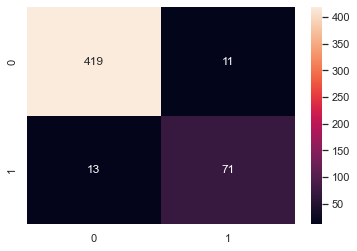

In [129]:
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='g'); 

Confusion Matrix After Tuning

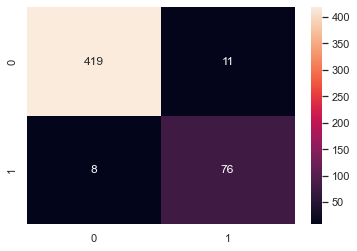

In [130]:
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='g');

- TP: 76 (diprediksi customer akan churn, dan aktualnya juga churn)
- TN: 419 (diprediksi tidak melakukan claim, dan aktualnya juga tidak melakukan claim)
- FP: 8 (diprediksi customer akan churn, tapi aktualnya TIDAK churn)
- FN: 11 (diprediksi customer tidak churn, tapi aktualnya churn)

FP cost: Kita mengira orang tersebut akan churn yg mana akan membuat perusahaan akan memberikan promo atau penawaran menarik untuk mencegah customer tersebut churn, padahal ternyata tidak churn. Jadi kita mengeluarkan uang untuk biaya promosi

FN cost: Kita mengira orang tersebut TIDAK akan churn, yangg artinya perusahaan TIDAK akan membuat promosi atau penawaran menarik terhadap oranmg tersebut, akan tetapi kenyataannya customer tersebut churn, sehingga perusahaan kehilangan uang.

### Model Limitation
Kita harus berhati-hati ketika melakukan interpretasi di luar interval independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

- `Tenure` < 37
- `WarehouseToHome` < 36.5.
- `HourSpendOnApp` antara 0.5 - 4.5
- `NumberofDeviceRegistered` antara  1.5 - 5.5
- `NumberofAddress` < 12
- `OrderAmountHikeFromlastYEar` < 25.5
- `CouponUsed` < 3.5
- `OrderCount` <6

### Feature Importances

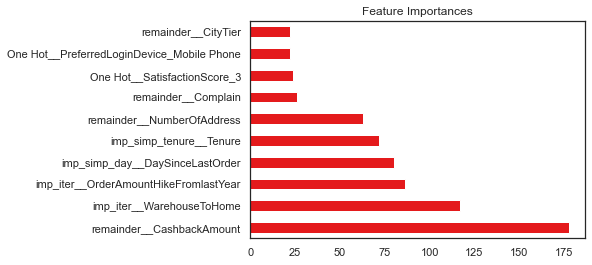

In [131]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer3.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()


## Conclusion and Recommendation

### Conclusion
Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memprediksi customer yang churn atau tidak, berdasarkan hasil f2score oleh model LGBM, kita mendapatkan akurasi f2score 0.849 sebelum hyperparameter tuning. Setelah melakukan hyperparameter tuning hasil meningkat menjadi 0.898. Untuk hasil yang tidak akurat, kita menitikberatkan ke False Negative karena lebih merugikan dibandingkan False Positive

Statistik Churn: 
- 0: 2152
- 1: 418
- **Total data**: 2570

Tanpa model:
Tanpa model, kita sulit untuk mengetahui customer mana yang churn atau tidak, Maka perhitungannya:
- Total customer yang pasti churn setelah diberi promo => 418 orang sehingga:
- Acquisition cost untuk menggantikan customer yang churn:
 418 * 450 USD = 188100 USD
- Total Biaya --> 188100 USD

Perbandingan dengan sampel (20%/100%)
- 188100 USD * 20% = **37620 USD**
- Jumlah penghematan => 0 USD

sehingga potensi biaya promosi yang dikeluarkan menjadi lebih banyak. Kita memberikan asumsi sekitar 50% customer yang churn akan menetap bila diberi promosi dan sisanya akan tetap churn. 

Dengan model (Test set yakni 20%):

**Total data**: 514

Berdasarkan confusion matrix:
- Biaya untuk promosi => (76+11) * 100 USD = 8700 USD
- Acquisition cost untuk menggantikan customer yang churn:
    8 * 450 USD = 3600 USD
- Total Biaya --> 8700 USD + 3600 USD = **12300 USD**
- Jumlah penghematan => **37620 USD - 12300 USD = 25320 USD**

Berdasarkan perhitungan di atas, dengan menggunakan model yang telah dibuat, perusahaan bisa jauh lebih menghemat biaya yang dikeluarkan. Lebih baik mengeluarkan biaya untuk retention cost daripada lebih berpotensi untuk kehilangan customer (churn).


### Recommendation
- Untuk Modeling:
  - Menambah fitur-fitur/kolom-kolom baru yang memiliki keterkaitan dengan potensi customer untuk churn.
  - Melakukan cohort analysis untuk melihat customer yang churn berdasarkan periode akses aplikasi/periode transaksi customer.
  - Menambah sampel pada dataset agar model dapat memiliki banyak referensi sehingga prediksi bisa menjadi lebih tepat.
  - Mencoba algoritma machine learning lainnya dan melakukan hyperparameter tuning.
  - Menganalisa data-data yang model yang salah prediksi untuk mengetahui alasannya dan karakteristiknya bagaimana.

- Untuk Bisnis:
  - Membuat marketing campaign yang lebih segmented (terutama untuk customer dengan karakteristik churn lebih tinggi, misal customer laki-laki, customer yang berstatus single) agar penggunaan budget marketing lebih sesuai juga.
  - Mereview UI/UX dari aplikasi ecommerce baik via computer/handphone agar dapat memberikan pengalaman yang lebih baik bagi customer saat berbelanja.
  - Memberikan lebih banyak promo dan support customer yang baik di awal bagi new customer agar dapat meningkatkan lamanya periode customer menggunakan layanan ecommerce.
  - Mempertimbangkan pemberian cashback (khususnya pada pembeli mobile phone) yang lebih banyak agar mengurangi jumlah customer yang churn.
  - Mereview kerjasama dengan pihak ketiga terkait support pembayaran COD guna meningkatkan experience yang lebih baik bagi customer.

## Model Deployment

In [133]:
import pickle

### Save Model

In [135]:
# fit
final_model = estimator.fit(X, y)

# save with pickle
pickle.dump(final_model, open('Ecommerce_churn_model_lgbm.sav', 'wb'))

### Load Model

In [138]:
loaded_model = pickle.load(open('Ecommerce_churn_model_lgbm.sav', 'rb'))

In [140]:
df_test = pd.DataFrame({
    'Tenure' : [11.0], 
    'PreferredLoginDevice' : ['Mobile Phone'], 
    'CityTier' : [3], 
    'WarehouseToHome' : [6.0], 
    'PreferredPaymentMode' : ['Debit Card'], 
    'Gender' : ['Male'], 
    'HourSpendOnApp' : [3.0],
    'NumberOfDeviceRegistered' : [3], 
    'PreferedOrderCat' : ['Laptop & Accessory'], 
    'SatisfactionScore' : [4], 
    'MaritalStatus' : ['Single'], 
    'NumberOfAddress' : [4], 
    'Complain' : [1],
    'OrderAmountHikeFromlastYear' : [13.0], 
    'CouponUsed' : [1.0], 
    'OrderCount' : [1.0], 
    'DaySinceLastOrder' : [2.0],
    'CashbackAmount' : [150.00]
    })

# print sample data
display(df_test)
# predict that data
print("predict proba :",loaded_model.predict_proba(df_test))
print("predict class :",loaded_model.predict(df_test))

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,11.0,Mobile Phone,3,6.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,4,1,13.0,1.0,1.0,2.0,150.0


predict proba : [[0.97709185 0.02290815]]
predict class : [0]
